# Random Forest

In this lab you will learn the most important aspects of the random forest learning method. 
Completing this lab and analyzing the code will give you a deeper understanding of these type of models.
In our experiments we will mostly use the package sklearn from which we import RandomForestClassifier.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor


%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
from sklearn.datasets import make_classification, make_regression

## Data Creation

First of all, we create a data set containing 1000 samples with 2 features and two classes:

In [ ]:
X, y = make_classification(n_samples = 1000,n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)

<b>Exercise 1:</b>

Visualize the data set. It should look like this:
<img src="figures/dataset.png" width="600"/>

In [ ]:

def generate_scatter_plot(X, y):

    class_colors = ['red','blue']

    fig = plt.figure(figsize=(12, 6)) # increase size of plot
    
    for i, class_color in enumerate(class_colors):
        # plot the points only of this class label
        plt.scatter(X[y == i, 0], X[y == i, 1], c=class_color) 

    plt.legend(loc="best") # with legend

generate_scatter_plot(X, y)

<b>Exercise 2:</b>

We split our data into train and test data. Then we can train our model (a random forest) on the train data and evaluate the model on the hold out test data. We split the data in a way that we train our model on 67% of the data and test our model on 33% of the data.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=42)

Train a random forest on the training data and report the accuracy for this model on the train and test data using the default parameters of a random forest (from sklearn). What can you conclude from this? .

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
# Create a random forest classifier
clf = RandomForestClassifier()

# Train the model on the training data
clf.fit(X_train, y_train)

# Predict the labels for the training and test data
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# Calculate the accuracy of the model on the training and test data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


## Decision Boundary

Sometimes it is helpful to plot the decision boundary for a learned model. To do so, we create a grid of data points and calculate the probability of belonging to class 1. 
(This can only be done once we have trained the random forest classifier)

In [ ]:
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()
h = .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
Z = Z.reshape(xx.shape)

Then we can plot the boundary using the 'contourf' function of matplotlib.

In [ ]:
cm = plt.cm.RdBu  # color map
plt.contourf(xx, yy, Z, alpha=.8, cmap=cm)
colors = ['red','blue']
for cur_class in [0,1]:
    plt.scatter(X[y==cur_class, 0], X[y == cur_class, 1], c=colors[cur_class],
                       edgecolors='k', alpha=0.6, label=cur_class)
plt.legend()
plt.show()

What can you conclude from the figure above?

## Parameter Selection

The implementation of the random forest algorithm in sklearn has many parameter. The most important ones are the number of trees used (n_estimators) and the maximal depth of a single tree (max_depth). Investigate how the number of used trees effects the training and testing accuracy.

<b>Exercise 3:</b>

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 20) used. This plot should look like this:
<img src="figures/num_trees.png" width="600"/>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the number of trees
num_trees = np.arange(1, 21)  # This creates an array from 1 to 20 inclusive

test_accuracy = []
train_accuracy = []

for n_trees in num_trees:  # Use a different variable here to avoid confusion

    clf = RandomForestClassifier(n_estimators=n_trees)
    clf.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)
    
    # Evaluate the model on the training set
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)

# Create the plot
plt.plot(num_trees, train_accuracy, label='Training Accuracy')
plt.plot(num_trees, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.legend()
plt.show()




<b>Optional:</b>

We want to further investigate how the number of used trees effects the training and testing accuracy. 
We want to increase the number of trees to a maximum of 50.

Plot a diagram that shows the training and testing accuracy depending on the number of trees (from 1 to 50) used.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the number of trees
num_trees = np.arange(1, 51)  # This creates an array from 1 to 20 inclusive

test_accuracy = []
train_accuracy = []

for n_trees in num_trees:  # Use a different variable here to avoid confusion

    clf = RandomForestClassifier(n_estimators=n_trees)
    clf.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)
    
    # Evaluate the model on the training set
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)

# Create the plot
plt.plot(num_trees, train_accuracy, label='Training Accuracy')
plt.plot(num_trees, test_accuracy, label='Testing Accuracy')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Number of Trees')
plt.legend()
plt.show()


<b>Exercise 4:</b>

We saw how the number of trees influences training and testing accuracy. 
Now we do same thing for the other important parameter max_depth.
Train multiple models with different depths. 
The models should use 30 trees as estimators.

Plot a diagram that shows the training and testing accuracy depending on the maximal depth of a single tree (from 1 to 50). 
This plot should look like this:
<img src="figures/max_depth.png" width="600"/>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Define the range for max_depth
max_depths = np.arange(1, 51)  # This creates an array from 1 to 50 inclusive

test_accuracy = []
train_accuracy = []

for depth in max_depths:

    clf = RandomForestClassifier(n_estimators=30, max_depth=depth)
    clf.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    test_pred = clf.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)
    
    # Evaluate the model on the training set
    train_pred = clf.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)

# Create the plot
plt.figure(figsize=(10, 5))  # Set the figure size as needed
plt.plot(max_depths, train_accuracy, label='Training Accuracy')
plt.plot(max_depths, test_accuracy, label='Testing Accuracy')
plt.xlabel('Max Depth of Trees')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy vs. Max Depth of Trees')
plt.legend()
plt.show()


## Churn Data Set
Lets revisit the churn data set from the first tutorial.

In [ ]:
churn_df = pd.read_csv('telecom_churn.csv')
label = churn_df['Churn']
churn_df = churn_df.drop(columns=['Churn'])



<b>Exercise 5:</b>

Create a data set containing only the numeric values. <b>Optional:</b> Try to convert all non numeric values to numeric values using a one hot encoding or by binning them. 

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Identify numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Optionally, convert non-numeric (categorical) columns to numeric using one-hot encoding
if 'convert_non_numeric' in locals() and convert_non_numeric:
    categorical_df = df.select_dtypes(exclude=[np.number])
    encoded_df = pd.get_dummies(categorical_df)
    # Combine the numeric dataframe with the encoded categorical dataframe
    numeric_df = pd.concat([numeric_df, encoded_df], axis=1)

numeric_df.shape


<b>Exercise 6:</b>

Train a model on this data set and visualize the most important features in a figure. This should look like this (The scaling and order of features can be different):
<img src="figures/importance.png" width="600"/>

<b>Hint</b>: The method feature_importance_ should be used.
What can you conclude?

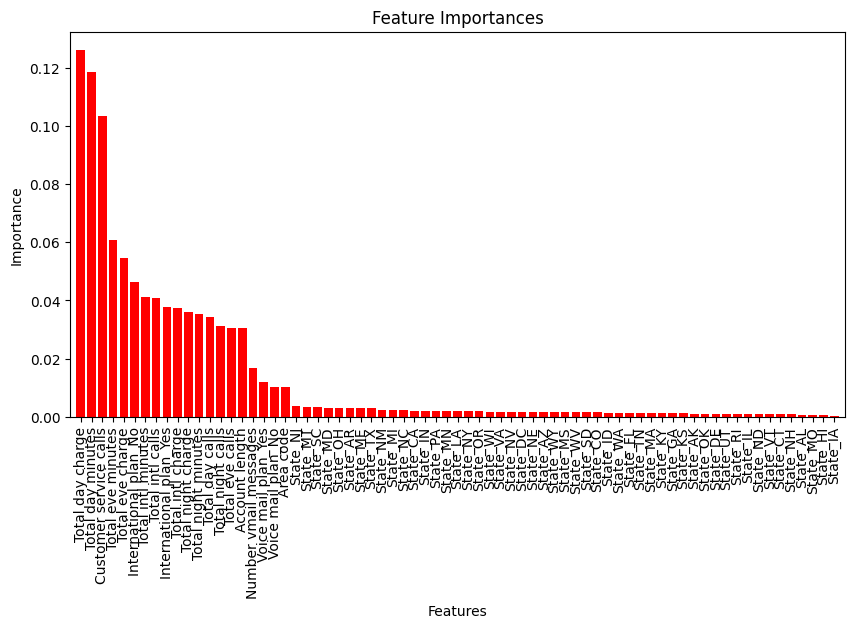

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('telecom_churn.csv')

# Handling non-numeric values by one-hot encoding
df = pd.get_dummies(df)

# Identify the target column (assuming the target column is named 'Churn')
X = df.drop('Churn', axis=1)  # Features
y = df['Churn']  # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances of the model
plt.figure(figsize=(10, 5))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


<b>Exercise 7:</b>

If we want to use a random forest to solve regression problems we can use the RandomForestRegressor from sklearn.
* Generate an easy regression data set using make_regression with 10 features. (use function make_regression)
* Split the data set into a train and test set.
* Train a model and report the training and testing mean square error (can be calculated using sklearn.metrics.mean_squared_error)

In [46]:
### WRITE YOUR CODE HERE ###
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate regression dataset
X, y = make_regression(n_samples=1000, n_features=10, random_state=42)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the training and testing sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate mean squared error for training and testing sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print("Training Mean Squared Error:", train_mse)
print("Testing Mean Squared Error:", test_mse)


Training Mean Squared Error: 1.8211138479991004e-26
Testing Mean Squared Error: 1.911750761261567e-26
